In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import os

In [2]:
data_raw = pd.read_csv(r"Bike Rental UCI dataset.csv")
print(data_raw.shape)
data_raw

(17379, 13)


,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0000,Sat,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0000,Sat,0,40
2,1,0,1,2,0,0,1,0.22,0.80,0.0000,Sat,0,32
3,1,0,1,3,0,0,1,0.24,0.75,0.0000,Sat,0,13
4,1,0,1,4,0,0,1,0.24,0.75,0.0000,Sat,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,2,0.26,0.60,0.1642,Mon,723,119
17375,1,1,12,20,0,1,2,0.26,0.60,0.1642,Mon,723,89
17376,1,1,12,21,0,1,1,0.26,0.60,0.1642,Mon,724,90
17377,1,1,12,22,0,1,1,0.26,0.56,0.1343,Mon,724,61


In [3]:
data_raw = data_raw.drop(['days'], axis = 1) # Dropping unnecessary column


In [4]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      17379 non-null  int64  
 1   yr          17379 non-null  int64  
 2   mnth        17379 non-null  int64  
 3   hr          17379 non-null  int64  
 4   holiday     17379 non-null  int64  
 5   workingday  17379 non-null  int64  
 6   weathersit  17379 non-null  int64  
 7   temp        17379 non-null  float64
 8   hum         17379 non-null  float64
 9   windspeed   17379 non-null  float64
 10  dayOfWeek   17379 non-null  object 
 11  demand      17379 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1.5+ MB


No null variables + we notice that some of the variables need to be changed from numerical to categorical.

In [5]:
list_of_category_variables = ["hr","dayOfWeek","mnth","season","weathersit","holiday","workingday"]
for var in list_of_category_variables:
    data_raw[var] = data_raw[var].astype("category")

#### DATA VISUALIZATION

[Text(0.5, 1.0, 'Boxplot of the hour of the day VS the demand'),
 Text(0.5, 0, 'Hour of the day')]

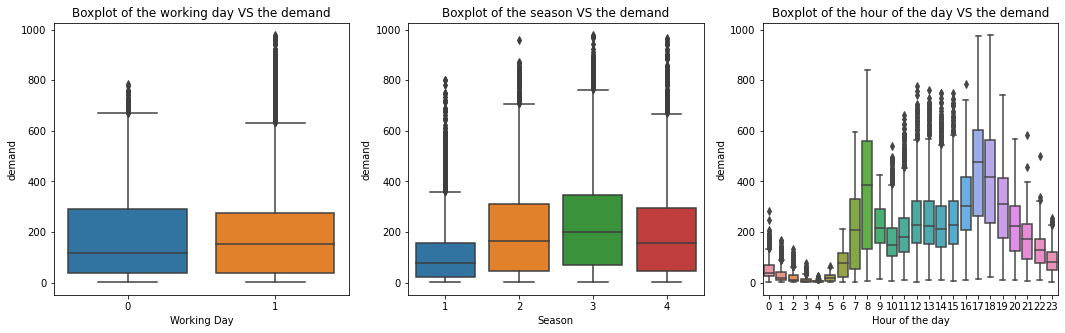

In [6]:
fig, (axe1, axe2, axe3) = plt.subplots(1,3)
fig.set_size_inches(18,5)
sn.boxplot(data=data_raw, x="workingday", y="demand", orient="v", ax=axe1)
sn.boxplot(data=data_raw, x="season", y="demand", orient="v",ax=axe2)
sn.boxplot(data=data_raw, x="hr", y="demand", orient="v",ax=axe3)

axe1.set(title="Boxplot of the working day VS the demand", xlabel="Working Day")
axe2.set(title="Boxplot of the season VS the demand", xlabel="Season")
axe3.set(title="Boxplot of the hour of the day VS the demand", xlabel="Hour of the day")

Through these plots, we can draw the following speculations:

1. During the weekend or the holidays, people tend to rent the bike more. Probably due to the availability of time during the day.
2. Summer and automn are the seasons where the bikes are the most coveted
3. During the day, there's two spikes of bike rental which correspond two the rush hours: the morning between 7AM and 9AM, and the evening between 5PM and 7PM

[Text(0.5, 0, 'Hour of the day'),
 Text(0, 0.5, 'Demand Average'),
 Text(0.5, 1.0, 'The average demand during the week')]

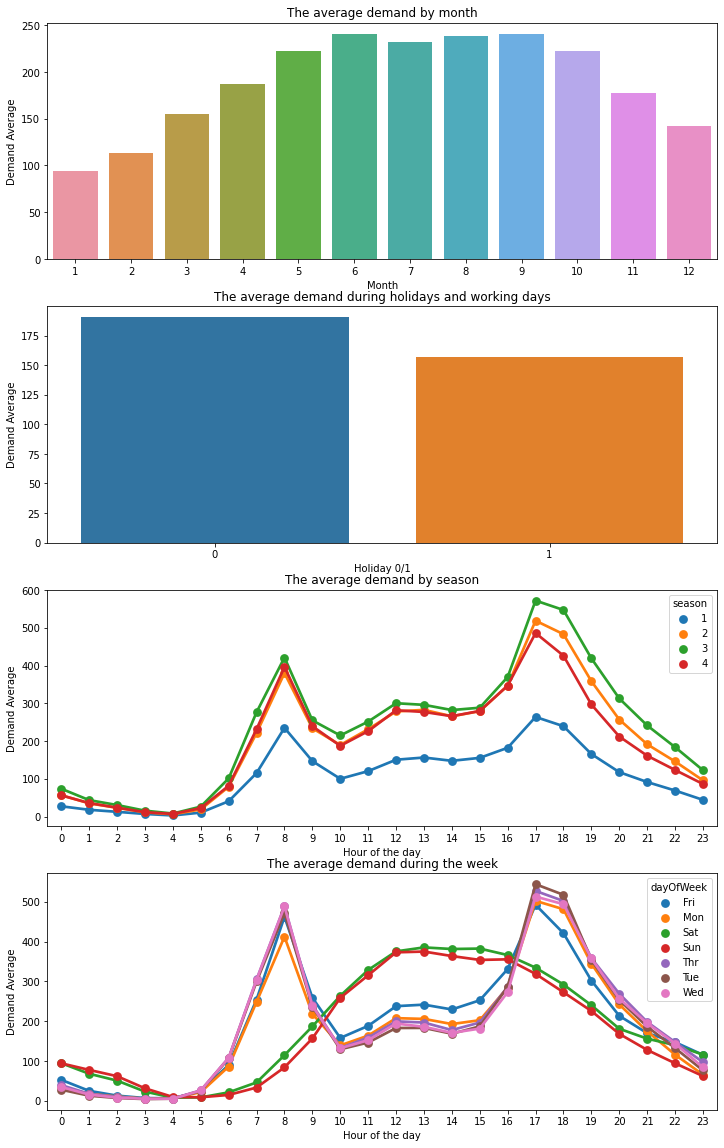

In [6]:
# Let's plot 4 plots using seaborn through which we can have a better understanding of the data
fig, (axe1, axe2, axe3, axe4) = plt.subplots(4)
fig.set_size_inches(12,20)


# We create new dataframes arranged by the mean of the demand
month_mean = pd.DataFrame(data_raw.groupby("mnth")["demand"].mean()).reset_index() 
sn.barplot(data = month_mean, x = "mnth", y = "demand", ax = axe1)

demand_holiday = pd.DataFrame(data_raw.groupby("holiday")["demand"].mean()).reset_index()
sn.barplot(data = demand_holiday, x = "holiday", y = "demand", ax = axe2)

hour_season_mean = pd.DataFrame(data_raw.groupby(["hr", "season"], sort = True)["demand"].mean()).reset_index()
sn.pointplot(data = hour_season_mean, x = "hr", y = "demand", hue = "season", join = True, ax = axe3)

hour_dayofweek_mean = pd.DataFrame(data_raw.groupby(["hr", "dayOfWeek"], sort = True)["demand"].mean()).reset_index()
sn.pointplot(data = hour_dayofweek_mean, x = "hr", y = "demand", hue = "dayOfWeek", join = True, ax = axe4)

# We label the plots
axe1.set(xlabel = "Month", ylabel = "Demand Average", title = "The average demand by month")
axe2.set(xlabel = "Holiday 0/1", ylabel = "Demand Average", title = "The average demand during holidays and working days")
axe3.set(xlabel = "Hour of the day", ylabel = "Demand Average", title = "The average demand by season")
axe4.set(xlabel = "Hour of the day", ylabel = "Demand Average", title = "The average demand during the week")

In the fourth plot, we can notice that during the working days, from monday to friday, there's an increase of bike rentals during the rush hours: [7AM - 9AM] & [5PM - 7PM]

Whereas during the week, it's totally the other way around: People prefere to rest during the morning and stroll during the evening.

### Feature Engineering


##### Data Skewness

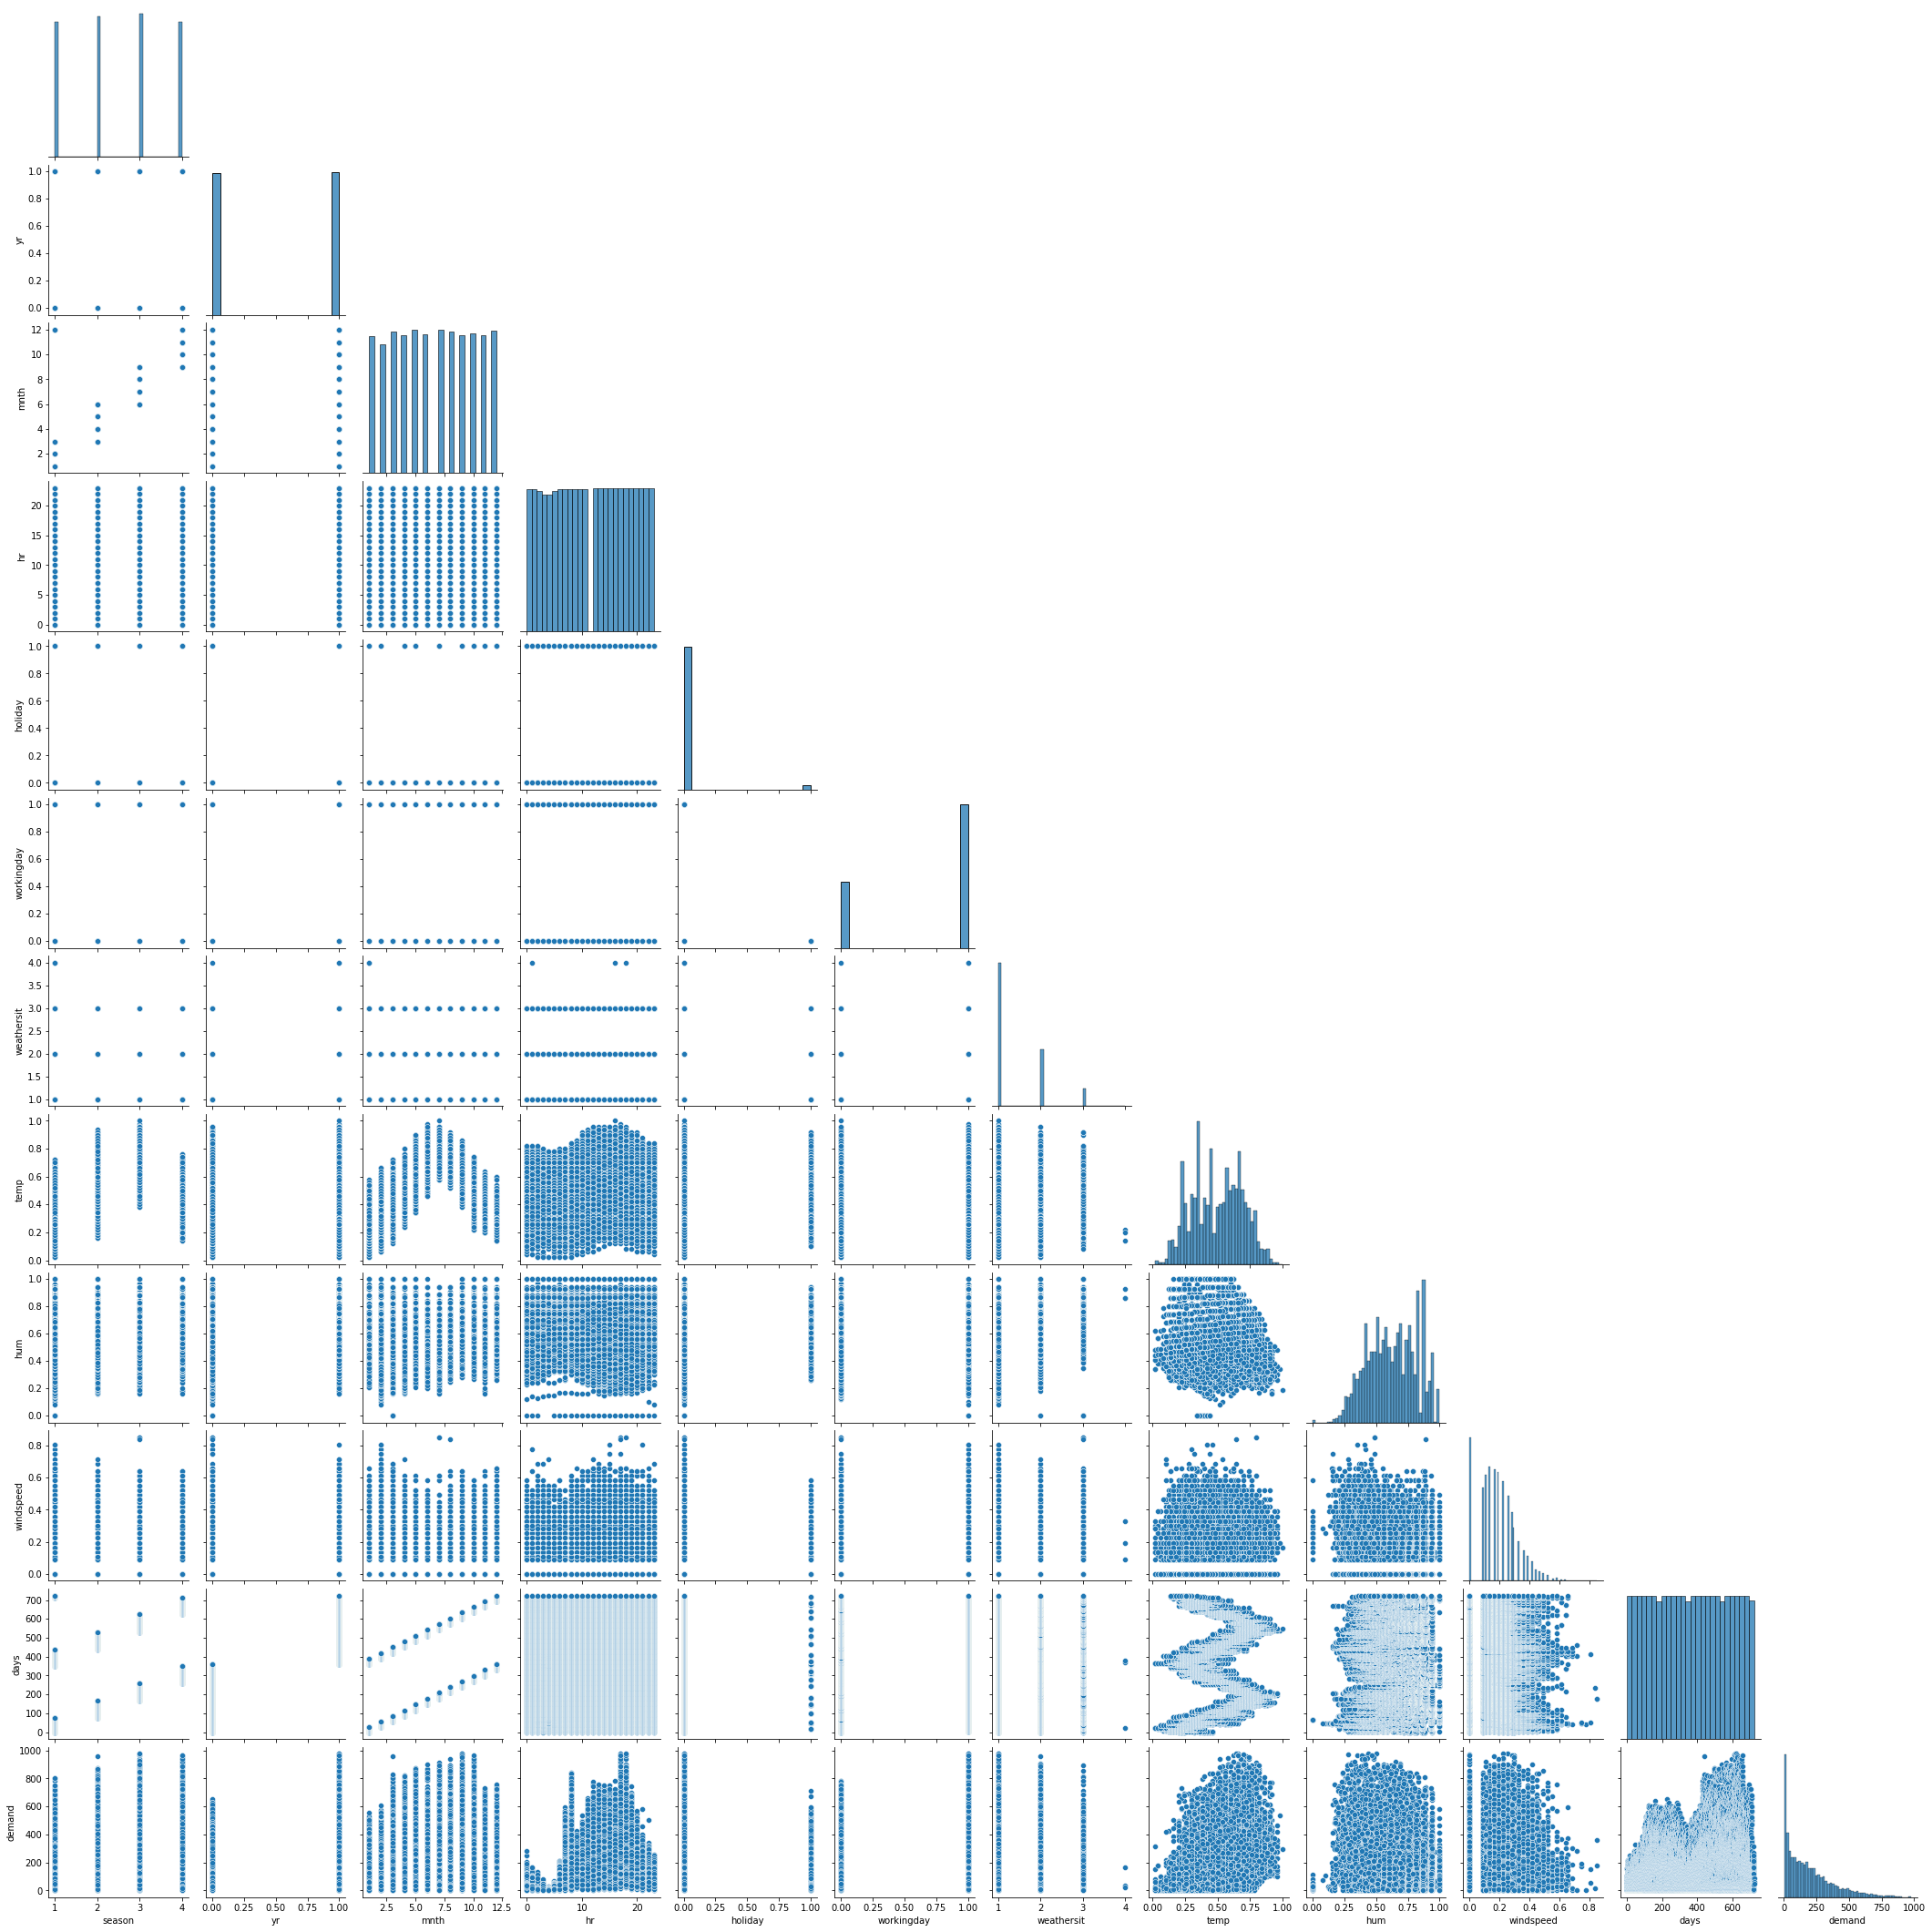

In [7]:
# Before we start
data = pd.read_csv(r"Bike Rental UCI dataset.csv")
data.drop(['days'], axis = 1)
sn.pairplot(data, corner= True)

c:\users\marou\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='demand', ylabel='Density'>

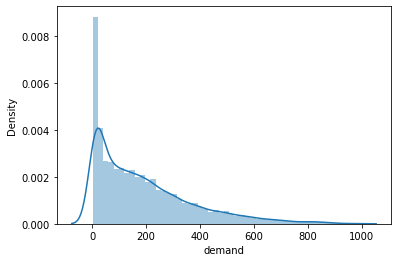

In [8]:
sn.distplot(data['demand'])

We can see that the distribution of the demand variable doesn't follow a normal distribution: It is distored

This phenomenon is called skewness of the data. In our case we have a positive skewness: the mean & the median are greater than the mode

- Why is it important?

Linear models work on the assumption that the distribution of the independent variable and the target variable are similar. Therefore, knowing about the skewness of the data and correcting it, help us in creating better linear models. Moreover, skewness tells us about the direction of the outliers in our data. We can use this information to get rid of them.

PS: Outliers can drastically change the results of our data analysis.

In [9]:
# Let's remove the outliers

data_cleaned = data[np.abs(data['demand'] - data['demand'].mean()) <= (3*data["demand"].std())]
print("After cleaning the data, %i outlier(s) got removed." % int(data.shape[0] - data_cleaned.shape[0]) )

After cleaning the data, 244 outlier(s) got removed.


c:\users\marou\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\marou\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


With outliers we have a skewness of: 1.277412
Without outliers we have a skewness of: 1.052685


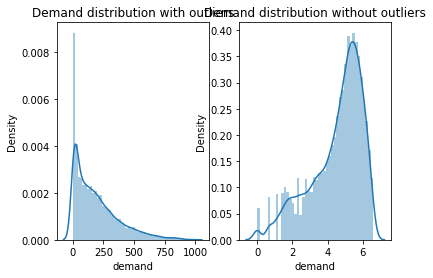

In [10]:
ig, (axe1, axe2) = plt.subplots(1,2)
fig.set_size_inches(12,8)
sn.distplot(np.log(data_cleaned['demand']), ax=axe2)
data_cleaned['demand'].skew()
sn.distplot(data['demand'], ax=axe1)
axe1.set(title = "Demand distribution with outliers")
axe2.set(title = "Demand distribution without outliers")
print("With outliers we have a skewness of: %f" % float(data['demand'].skew()))
print("Without outliers we have a skewness of: %f" % float(data_cleaned['demand'].skew()))

### Data Preparation

In [11]:
# We change the dayOfWeek column from strings to int
data_cleaned['dayOfWeek'].replace({'Mon': 1, 'Tue': 2, 'Wed': 3, 'Thr': 4, 'Fri': 5, 'Sat': 6, 'Sun': 7}, inplace = True)
data_cleaned.head(2)

C:\Users\marou\AppData\Roaming\Python\Python38\site-packages\pandas\core\series.py:4563: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,season,yr,mnth,hr,holiday,workingday,weathersit,temp,hum,windspeed,dayOfWeek,days,demand
0,1,0,1,0,0,0,1,0.24,0.81,0.0,6,0,16
1,1,0,1,1,0,0,1,0.22,0.80,0.0,6,0,40


In [12]:
# Grab the relevent features and labels and store them respectively in x & y
x = data_cleaned[['season', 'yr', 'mnth', 'hr', 'holiday', 'workingday', 'weathersit', 'temp', 'hum', 'windspeed', 'dayOfWeek']]
y = data_cleaned[['demand']]

#### Linear Regression with Scikit-Learn

In [13]:
# Splitting the data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
print("training set : ", x_train.shape, y_train.shape)
print("testing set : ", x_test.shape, y_test.shape)

training set :  (13708, 11) (13708, 1)
testing set :  (3427, 11) (3427, 1)


In [14]:
#scaling data
from sklearn.preprocessing import MinMaxScaler
train_scaler = MinMaxScaler()
test_scaler = MinMaxScaler()
x_train= train_scaler.fit_transform(x_train)
x_test = test_scaler.fit_transform(x_test)

# we add the bias column
x_train = np.c_[np.ones(x_train.shape[0]), x_train]
x_test = np.c_[np.ones(x_test.shape[0]), x_test]

In [15]:
# Training the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(x_train, y_train)

train_score = model.score(x_train, y_train)
print("Model has been built successfuly with as intercept : ", model.intercept_ , "as coefficients : \n ", model.coef_ )
print("The R2 score for training set is : ", train_score)

test_score = model.score(x_test, y_test)
print("The R2 score for test set is : ", test_score)

from sklearn.metrics import mean_squared_error

predictions_test, predictions_train = model.predict(x_test), model.predict(x_train)
mse_test, mse_train = mean_squared_error(y_test, predictions_test), mean_squared_error(y_train, predictions_train)
print("The Mean Squared Error for the train set: %f" % mse_train)
print("The Mean Squared Error for the test set: %f" % mse_test)

Model has been built successfuly with as intercept :  [24.75076602] as coefficients : 
  [[   0.           56.42305992   67.0017519    -2.01155967  166.14339393
   -19.99683329   -1.68849468   -4.60353063  256.08078842 -187.42712734
    21.37390492    6.86103187]]
The R2 score for training set is :  0.3825398640026979
The R2 score for test set is :  0.37704992889681355
The Mean Squared Error for the train set: 16972.491108
The Mean Squared Error for the test set: 17435.955944


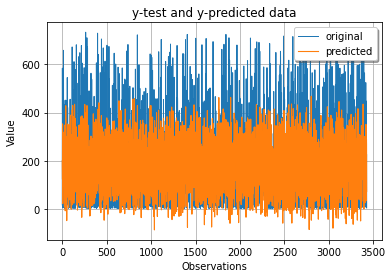

In [16]:
# Real demand value against predicted demand value
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, predictions_test, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('Observations')
plt.ylabel('Value')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

#### Normal Equation

In the following implementation of the normal equation we encountered a mathematical problem regarding the singularity of the matrix (x_transpose_x). In order to resolve this problem, we decided to drop some features to make the matrix invertible.

In [17]:
def normal_equation(x, y):
    x_transpose_x = x.transpose().dot(x)
    w_normal = np.linalg.inv(x_transpose_x).dot(x.transpose()).dot(y)
    return w_normal
    

In [22]:
normal_data = data_cleaned.drop(['yr', 'days', 'holiday'], axis = 1)


y_normal = normal_data['demand']
x_normal = normal_data[['season','mnth', 'weathersit','workingday', 'hr' ,'temp', 'hum', 'windspeed', 'dayOfWeek']]

x_normal_train, x_normal_test, y_normal_train, y_normal_test = train_test_split(x_normal, y_normal, test_size = 0.2, random_state = 42)

w_normal = normal_equation(x_normal_train, y_normal_train)


print("R2 Normal Equation on train set: ", R2_score(np.dot(x_normal_train,w_normal),y_normal_train))
print("R2 Normal Equation on test set: ", R2_score(np.dot(x_normal_test,w_normal),y_normal_test))



R2 Normal Equation on train set:  0.34099731747336726
R2 Normal Equation on test set:  0.33078755386492975


In [19]:
def gradient_descent_scratch(x, y, iterations, alpha, delta):
    m = y.size
    w = np.zeros((x.shape[1], 1))
    cost=[]
    cost_cache = [0]
    w_cache = []
    for i in range(iterations):
        prediction = np.dot(x, w)
        loss = prediction - y
        cost = 1/(2*m) * np.dot(loss.T, loss)
        prev_loss = cost_cache[-1]
        new_loss=cost[0][0]
        cost_cache.append(cost)
        w = w - (alpha  * np.dot(x.T, loss))
        w_cache.append(w)
        if(np.abs(new_loss-prev_loss)<delta):
            print("The cost function converged after %i iteration(s)" % len(cost_cache))
            print("The new loss is: %f" % new_loss)
            print("The previous loss is: %f" % prev_loss[0][0])
            print("The parameters that optimized the cost function are: \n" , w_cache[-1])
            plt.plot(cost_cache[:30])
            break
        if new_loss>prev_loss:
            alpha = alpha/3
            print("alpha reduced: ", alpha)
       
    return w_cache, cost_cache

alpha reduced:  3.3333333333333335e-05
alpha reduced:  1.1111111111111112e-05
The cost function converged after 3015 iteration(s)
The new loss is: 8486.249412
The previous loss is: 8486.249422
The parameters that optimized the cost function are: 
 [[  24.10454355]
 [  56.40505628]
 [  67.02237276]
 [  -1.99468852]
 [ 166.21223933]
 [ -19.67269375]
 [  -1.50396919]
 [  -4.7427588 ]
 [ 256.17178442]
 [-187.05947954]
 [  21.71411776]
 [   7.11984463]]


C:\Users\marou\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


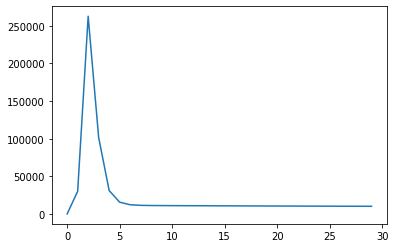

In [20]:
w_cache, cost_cache = gradient_descent_scratch(x_train, y_train, 10000, 0.0001, 0.00001)

In [23]:
# Implementing a function that calculates R2 score from scratch
def R2_score(predictions,y):
    err = predictions - y
    err_sq = np.dot(err.transpose(),err)
    y_mean = y.mean()
    var = y-y_mean
    var_sq = np.dot(var.transpose(), var)
    return 1 - err_sq/var_sq

In [31]:
r2_train = R2_score((np.dot(x_train,w_cache), y_train).reshape(13708, 3014))
r2_test = R2_score(np.dot(x_test,w_cache), y_test)

print("The R2 score for the training set is: %f" %r2_train)
print("The R2 score for the test set is: %f" %r2_test)

MemoryError: Unable to allocate 315. MiB for an array with shape (13708, 3014, 1) and data type float64

###### Dummied Data
- Let's improve the accuracy of our models, by applying some change on our data using pandas' method: get_dummies

In [36]:
dummied_data = pd.get_dummies(data_cleaned, columns=['season', 'yr', 'mnth', 'hr', 'weathersit', 'dayOfWeek'])
x_dummied = dummied_data.drop(['demand'], axis = 1)

x_dummied_train, x_dummied_test, y_dummied_train, y_dummied_test = train_test_split(x_dummied, y, test_size = 0.3, random_state = 42)

#### Scikit-Learn model on dummied data

In [37]:
new_model = LinearRegression()
new_model.fit(x_dummied_train, y_dummied_train)

LinearRegression()

In [38]:
# R2 SCORE WITH DUMMIED DATA
print("The R2 score for scikit model on the training set is : ", new_model.score(x_dummied_train, y_dummied_train))
print("The R2 score for the scikit model on the test set is : ", new_model.score(x_dummied_test, y_dummied_test))

# Mean Squared Error WITH DUMMIED DATA
predictions_dummied_test, predictions_dummied_train = new_model.predict(x_dummied_test),new_model.predict(x_dummied_train)
mse_dummied_test, mse_dummied_train = mean_squared_error(y_dummied_test, predictions_dummied_test), mean_squared_error(y_dummied_train, predictions_dummied_train)
print("The Mean Squared Error for the scikit model on the train set: %f" % mse_dummied_train)
print("The Mean Squared Error for the scikit model on the test set: %f" % mse_dummied_test)

The R2 score for scikit model on the training set is :  0.6724147721474394
The R2 score for the scikit model on the test set is :  0.6781730790314306
The Mean Squared Error for the scikit model on the train set: 8982.419836
The Mean Squared Error for the scikit model on the test set: 9004.395129


### In conclusion: 
Feature engineering is an important step during an analysis of dataset. Without this step, our models can never achieve their true potentiel. We can use some of these powerful tools to improve the accuracy, or other metrics, of our models. For instance: one hot encoding or the dummy method.